In [1]:
# yearurl.py
def twodigit(n):  #將數值轉為二位數字串
    if(n < 10):
        retstr = '0' + str(n)
    else:
        retstr = str(n)
    return retstr
  
urlbase = 'http://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date=2019'  #網址前半
urltail = '01&stockNo=2317&_=1521363562193'  #網址後半
for i in range(1, 13):  #取1到12數字
    url_twse = urlbase + twodigit(i) + urltail  #組合網址
    print(url_twse)

http://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date=20190101&stockNo=2317&_=1521363562193
http://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date=20190201&stockNo=2317&_=1521363562193
http://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date=20190301&stockNo=2317&_=1521363562193
http://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date=20190401&stockNo=2317&_=1521363562193
http://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date=20190501&stockNo=2317&_=1521363562193
http://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date=20190601&stockNo=2317&_=1521363562193
http://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date=20190701&stockNo=2317&_=1521363562193
http://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date=20190801&stockNo=2317&_=1521363562193
http://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date=20190901&stockNo=2317&_=1521363562193
http://www.twse.com.tw/exchangeReport/STOCK_DAY?respons

In [1]:
# stockmonth.py
def convertDate(date):  #轉捔民國日期為西元:108/01/01->20190101
    str1 = str(date)
    yearstr = str1[:3]  #取出民國年
    realyear = str(int(yearstr) + 1911)  #轉為西元年
    realdate = realyear + str1[4:6] + str1[7:9]  #組合日期
    return realdate

import requests
import json, csv
import pandas as pd
import os
import matplotlib.pyplot as plt

plt.rcParams["font.sans-serif"] = "mingliu"  #設定中文字型
plt.rcParams["axes.unicode_minus"] = False 

pd.options.mode.chained_assignment = None  #取消顯示pandas資料重設警告

filepath = 'stockmonth01.csv'

if not os.path.isfile(filepath):  #如果檔案不存在就建立檔案
    url_twse = 'http://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date=20190101&stockNo=2317&_=1521363562193'
    res = requests.get(url_twse)  #回傳為json資料
    jdata = json.loads(res.text)  #json解析
    
    outputfile = open(filepath, 'w', newline='', encoding='utf-8')  #開啟儲存檔案
    outputwriter = csv.writer(outputfile)  #以csv格式寫入檔案
    outputwriter.writerow(jdata['fields'])
    for dataline in (jdata['data']):  #寫入資料
        outputwriter.writerow(dataline)
    outputfile.close()  #關閉檔案

pdstock = pd.read_csv(filepath, encoding='utf-8')  #以pandas讀取檔案
for i in range(len(pdstock['日期'])):  #轉換日期式為西元年格
    pdstock['日期'][i] = convertDate(pdstock['日期'][i])
pdstock['日期'] = pd.to_datetime(pdstock['日期'])  #轉換日期欄位為日期格式
pdstock.plot(kind='line', figsize=(12, 6), x='日期', y=['收盤價', '最低價', '最高價'])  #繪製統計圖

/Users/kuochihlo/.pyenv/versions/anaconda3-5.3.0/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


/Users/kuochihlo/.pyenv/versions/anaconda3-5.3.0/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


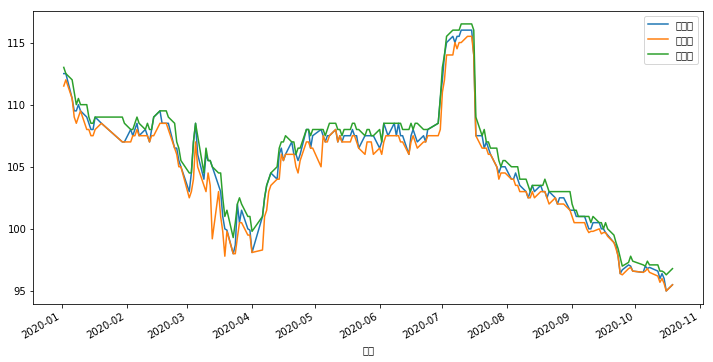

In [5]:
# stockyear.py
def twodigit(n):  #將數值轉為二位數字串
    if(n < 10):
        retstr = '0' + str(n)
    else:
        retstr = str(n)
    return retstr

def convertDate(date):  #轉捔民國日期為西元:108/01/01->20190101
    str1 = str(date)
    yearstr = str1[:3]  #取出民國年
    realyear = str(int(yearstr) + 1911)  #轉為西元年
    realdate = realyear + str1[4:6] + str1[7:9]  #組合日期
    return realdate

import requests
import json, csv
import pandas as pd
import os
import time
import matplotlib.pyplot as plt

plt.rcParams["font.sans-serif"] = "mingliu"  #設定中文字型
plt.rcParams["axes.unicode_minus"] = False 

pd.options.mode.chained_assignment = None  #取消顯示pandas資料重設警告


urlbase = 'https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date=2020'
urltail = '01&stockNo=3045&_=1603098508034'
filepath = 'stock_3045_year2020.csv'

# urlbase = 'https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date=2020'
# urltail = '01&stockNo=2317&_=1603098508028'
# filepath = 'stockyear2020.csv'

# urlbase = 'http://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date=2019'  #網址前半
# urltail = '01&stockNo=2317&_=1521363562193'  #網址後半
# filepath = 'stockyear2019.csv'

if not os.path.isfile(filepath):  #如果檔案不存在就建立檔案
    for i in range(1, 11):  #取1到12數字
        url_twse = urlbase + twodigit(i) + urltail  #組合網址
        res = requests.get(url_twse)  #回傳為json資料
        jdata = json.loads(res.text)  #json解析
        
        outputfile = open(filepath, 'a', newline='', encoding='utf-8')  #開啟儲存檔案
        outputwriter = csv.writer(outputfile)  #以csv格式寫入檔案
        if i==1:  #若是1月就寫入欄位名稱
            outputwriter.writerow(jdata['fields'])
        for dataline in (jdata['data']):  #逐月寫入資料
            outputwriter.writerow(dataline)
        time.sleep(0.5)  #延遲0.5秒,否則有時會有錯誤
    outputfile.close()  #關閉檔案

pdstock = pd.read_csv(filepath, encoding='utf-8')  #以pandas讀取檔案
for i in range(len(pdstock['日期'])):  #轉換日期式為西元年格式
    pdstock['日期'][i] = convertDate(pdstock['日期'][i])
pdstock['日期'] = pd.to_datetime(pdstock['日期'])  #轉換日期欄位為日期格式
pdstock.plot(kind='line', figsize=(12, 6), x='日期', y=['收盤價', '最低價', '最高價'])  #繪製統計圖

In [10]:
# stockyear_plotly.py
def twodigit(n):  #將數值轉為二位數字串
    if(n < 10):
        retstr = '0' + str(n)
    else:
        retstr = str(n)
    return retstr

def convertDate(date):  #轉捔民國日期為西元:106/03/02->20170302
    str1 = str(date)
    yearstr = str1[:3]  #取出民國年
    realyear = str(int(yearstr) + 1911)  #轉為西元年
    realdate = realyear + str1[4:6] + str1[7:9]  #組合日期
    return realdate

import requests
import json, csv
import pandas as pd
import os
import time

from plotly.graph_objs import Scatter, Layout
from plotly.offline import plot

pd.options.mode.chained_assignment = None  #取消顯示pandas資料重設警告

urlbase = 'https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date=2020'
urltail = '01&stockNo=1229&_=1603099440396'
filepath = 'stock_1229_year2020.csv'

# urlbase = 'https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date=2020'
# urltail = '01&stockNo=2105&_=1603099440388'
# filepath = 'stock_2105_year2020.csv'

# urlbase = 'https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date=2020'
# urltail = '01&stockNo=2412&_=1603099440382'
# filepath = 'stock_2412_year2020.csv'

# urlbase = 'https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date=2020'
# urltail = '01&stockNo=3045&_=1603098508034'
# filepath = 'stock_3045_year2020.csv'

# urlbase = 'http://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date=2019'  #網址前半
# urltail = '01&stockNo=2317&_=1521363562193'  #網址後半
# filepath = 'stockyear2019.csv'

if not os.path.isfile(filepath):  #如果檔案不存在就建立檔案
    for i in range(1, 11):  #取1到12數字
        url_twse = urlbase + twodigit(i) + urltail  #組合網址
        res = requests.get(url_twse)  #回傳為json資料
        jdata = json.loads(res.text)  #json解析
        
        outputfile = open(filepath, 'a', newline='', encoding='utf-8')  #開啟儲存檔案
        outputwriter = csv.writer(outputfile)  #以csv格式寫入檔案
        if i==1:  #若是1月就寫入欄位名稱
            outputwriter.writerow(jdata['fields'])
        for dataline in (jdata['data']):  #逐月寫入資料
            outputwriter.writerow(dataline)
        time.sleep(0.5)  #延遲0.5秒,否則有時會有錯誤
    outputfile.close()  #關閉檔案

pdstock = pd.read_csv(filepath, encoding='utf-8')  #以pandas讀取檔案
for i in range(len(pdstock['日期'])):  #轉換日期式為西元年格式
    pdstock['日期'][i] = convertDate(pdstock['日期'][i])
pdstock['日期'] = pd.to_datetime(pdstock['日期'])  #轉換日期欄位為日期格式
data = [
    Scatter(x=pdstock['日期'], y=pdstock['收盤價'], name='收盤價'),
    Scatter(x=pdstock['日期'], y=pdstock['最低價'], name='最低價'),
    Scatter(x=pdstock['日期'], y=pdstock['最高價'], name='最高價')
]
plot({"data": data, "layout": Layout(title='2020年個股統計圖')},auto_open=True)

'file:///Users/kuochihlo/Documents/Python大數據特訓班/Python大數據特訓班(第二版)學習資源/本書範例/ch10/temp-plot.html'